## 5 R randomForest package
In this section we provide a comparison example with `randomForest` package in **R** and its main differences with the scikit-learn implementation. R does not offer a complete container and a standard interface to Machine Learning algorithms like scikit-learn thus each algorithm has its own package and its own interface. As dispersive as it may seem it has the advantage that each algorithm can be tweaked beyond the standard implementation and can offer several additional tricks.

It is possible to use **R** directly from **Python** with the module [rpy2](http://rpy.sourceforge.net/), with results that can be passed back and forth between the two languages. It seems a fairly robust and well maintaned.

In [1]:
%load_ext rpy2.ipython

The command above load an extension for ipython with rpy2 and allows ipython notebook to interpret R syntax to be used whithin the notebook (using the magic `%R`)

In [2]:
%R library(randomForest)
%R library(foreign)
%R data <- read.arff("../machine_learning/example_data/Training Dataset.arff")
%R print("Data loaded")

/usr/local/lib/python2.7/dist-packages/rpy2/robjects/functions.py:106: UserWarning: randomForest 4.6-10

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/usr/local/lib/python2.7/dist-packages/rpy2/robjects/functions.py:106: UserWarning: Type rfNews() to see new features/changes/bug fixes.

  res = super(Function, self).__call__(*new_args, **new_kwargs)


[1] "Data loaded"


In [3]:
%R rfc <- randomForest(Result ~., data=data, importance=T, proximity=T)
%R print(rfc)


Call:
 randomForest(formula = Result ~ ., data = data, importance = T,      proximity = T) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 5

        OOB estimate of  error rate: 3.09%
Confusion matrix:
      1   -1 class.error
1  6024  133  0.02160143
-1  209 4689  0.04267048


Calling the randomForest method returns an object that contains all the information about the results, such as formula, error rate, confusion matrix, importance, etc. Each piece of information can be retrieved either by printing a summary of the object or with a specific function (or accessing the corresponding variable in the data structure directly). For example it is possibile to retrieve information about variable importance with the command `importance`.

### 5.1 Variable importance
The package randomForest in R has both methods for assessing variable importance, that is the one based on gini index (the same used in scikit-learn) and the one based on accuracy (shuffling of OOB variables) described in the original Breiman paper. The latter method is the one regarded as the most accurate in the literature (and for which it is possible to derive formal measure of accuracy).

In [4]:
%R print(importance(rfc, type=1))

                            MeanDecreaseAccuracy
having_IP_Address                       41.39601
URL_Length                              37.93692
Shortining_Service                      22.50947
having_At_Symbol                        27.58166
double_slash_redirecting                25.90781
Prefix_Suffix                           43.28012
having_Sub_Domain                       65.60224
SSLfinal_State                          94.25260
Domain_registeration_length             38.98349
Favicon                                 22.07652
port                                    16.75037
HTTPS_token                             29.00905
Request_URL                             41.77487
URL_of_Anchor                           81.33707
Links_in_tags                           80.74345
SFH                                     45.69180
Submitting_to_email                     33.21095
Abnormal_URL                            25.92600
Redirect                                31.28425
on_mouseover        

In [5]:
%R print(importance(rfc, type=2))

                            MeanDecreaseGini
having_IP_Address                  54.512603
URL_Length                         36.210969
Shortining_Service                 22.770973
having_At_Symbol                   20.409061
double_slash_redirecting           18.091619
Prefix_Suffix                     233.428100
having_Sub_Domain                 301.173813
SSLfinal_State                   1701.365256
Domain_registeration_length        76.446205
Favicon                            19.467232
port                               12.658135
HTTPS_token                        25.701586
Request_URL                        81.317630
URL_of_Anchor                    1304.065528
Links_in_tags                     196.676588
SFH                                92.782148
Submitting_to_email                22.696708
Abnormal_URL                       20.921589
Redirect                           22.041497
on_mouseover                       15.780596
RightClick                          7.398601
popUpWidno

As can be seen in the plot below, there is not much difference in this two type of importances, at least for this dataset. However, some of the least important features are mixed up.

**TODO:** E' possibile sistemare i grafici in modo che le didascalie siano più visibili? Possiamo usare barh al posto di barplot per fare dei grafici con barre orizzontali anziché verticali, vedi esempio: http://matplotlib.org/examples/lines_bars_and_markers/barh_demo.html

possiamo anche mettere i due grafici affiancati come nell'esempio al fondo di np03v03_numpy_plotting

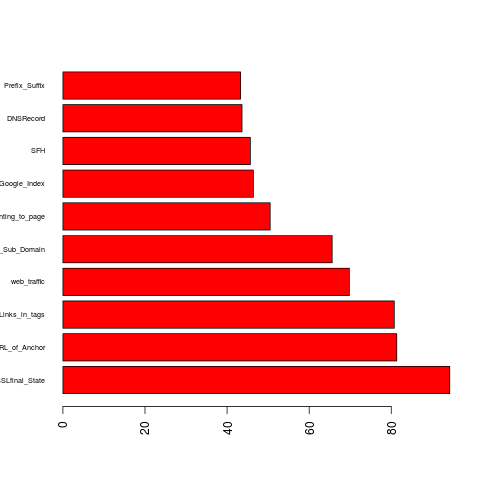

[1] "MeanDecreaseAccuracy"


In [24]:
#%R imp = importance(rfc, type = 1)
#%R barplot(imp[order(-imp)[1:10],1], cex.names=0.6, las=2, col="red", ylim=c(0,100))
%R imp <- rfc$importance[,3] / rfc$importanceSD[,3]
%R impOrd <- order(-imp)
%R barplot(imp[impOrd[1:10]], cex.names=0.6, las=2, col="red", horiz=T)
%R print("MeanDecreaseAccuracy")

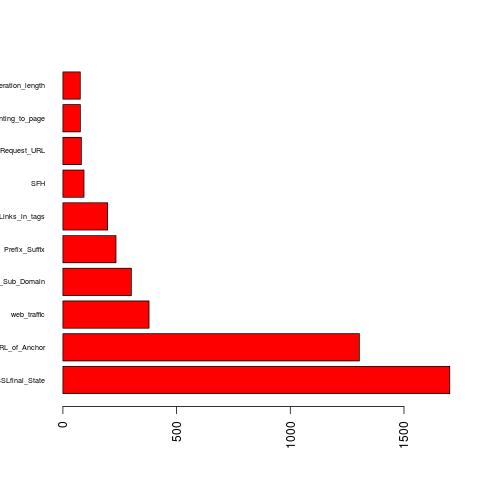

[1] "MeanDecreaseGini"


In [25]:
%R imp <- rfc$importance[,4]
%R barplot(rfc$importance[order(-imp)[1:10],4], cex.names=0.6, las=2, col="red", horiz=TRUE)
%R print("MeanDecreaseGini")

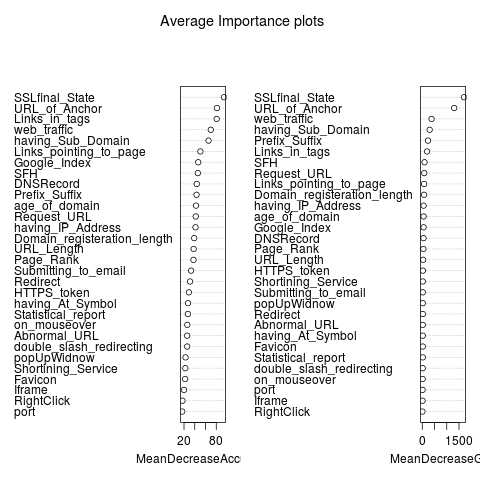

[1] "Average Importance plots"


In [13]:
%R varImpPlot(rfc, main=" Average Importance plots")
%R print("Average Importance plots")

In **R**, there are many ways (and many functions) for plotting each plot. `varImpPlot` is a function that automatically plots variable importance with axis exchanged for better reading (feature names are read more easily if horizontal).

### 5.2 Feature selection

With the package `varSelRF` it is possible to use Random Forests to automatically choose the best subset of variables among that in the dataset. It is an automatical procedure in which at each itearation the least important variables are discarded until the OOB score stop to decrease. 

In [ ]:
%R library(varSelRF)
%R rf.vs1 = varSelRF(data[,-(ncol(data))], data[,ncol(data)], ntree = 200, ntreeIterat = 100, vars.drop.frac = 0.2, mtryFactor = 5)
#command:
#rf.vs1 = varSelRF(data[,-(ncol(data))], 
#                  data[,ncol(data)], 
#                  ntree = 200, 
#                  ntreeIterat = 100, 
#                  vars.drop.frac = 0.2, 
#                  mtryFactor = 5)
%R print(rf.vs1)

In [ ]:
%R plot(rf.vs1)

This picture shows the initial variable importances and the change in OOB error corresponding to the number of variables used. 

### 5.3 Proximity plot

**TODO:** Se non riusciamo a dare un significato o un'interpretazione a questi grafici, forse sarebbe meglio toglierli..

If the parameter proximity is set to True, during the process of growing a random forest, an $N \times N$ proximity matrix is accumulated for the training data. For every tree, any pair of oob observations sharing a leaf has their proximity increased. The matrix is then scaled to be represented in two dimensions. Proximity plot gives an indication of which observation are effectively close as learned by the random forest classifier.

Proximity plots for random forests often look very similar they tend to have a star shape,
one arm per class, which is more pronounced the better the classification
performance.

In [ ]:
%R MDSplot(rfc, data[,ncol(data)])
%R print("Multi-dimensional Scaling Plot of Proximity matrix from randomForest")